In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

df = pd.read_csv('stud_math.csv')
pd.set_option('display.max_columns', 30) 

#Устранение пропусков:

for row in range(0, len(df)):
    if df['score'][row] == 'NaN':
        df = df.drop(row)

num_columns = ['age', 'famrel', 'freetime', 'goout', 'health', 'absences', 'failures', 'studytime', 
               'studytime, granular', 'traveltime', 'Medu', 'Fedu']

for column in df.columns:
    if column in num_columns:
        median_ = df[column].median()
        df[column].fillna(value=median_, inplace=True, axis=0)
    else:
        mode_ = df[column].mode()[0] 
        df[column].fillna(value=mode_, inplace=True, axis=0)

#Устранение выбросов:

for column in df.columns:
    if column in num_columns:
        q1 = df[column].quantile(q = 0.25)
        q3 = df[column].quantile(q = 0.75)
        for value in df[column]:
            if value - 2*(df[column].std()) >= q3:
                value = q3
            elif value + 2*(df[column].std()) <= q1:
                value = q1

In [23]:
#Количество уникальных значений номинативных переменных:

uniq_values = {}

for column in df.columns:
    if column not in num_columns and column != 'score':
        uniq_values[column] = df[column].nunique()
        
print(uniq_values)

{'school': 2, 'sex': 2, 'address': 2, 'famsize': 2, 'Pstatus': 2, 'Mjob': 5, 'Fjob': 5, 'reason': 4, 'guardian': 3, 'schoolsup': 2, 'famsup': 2, 'paid': 2, 'activities': 2, 'nursery': 2, 'higher': 2, 'internet': 2, 'romantic': 2}


In [ ]:
Результат: {'school': 2, 'sex': 2, 'address': 2, 'famsize': 2, 'Pstatus': 2, 'Mjob': 5, 'Fjob': 5, 'reason': 4,
#'guardian': 3, 'schoolsup': 2, 'famsup': 2, 'paid': 2, 'activities': 2, 'nursery': 2, 'higher': 2,
#'internet': 2, 'romantic': 2}. Как можно видеть, всё оказалось довольно просто - большая часть номинативных
#переменных в датасете содержит ответ на бинарный вопрос, а из оставшихся четырёх переменных ни одна не содержит
#больше, чем пять уникальных значений.

In [21]:
#Корреляционный анализ:
#будем считать достойными внимания коэффициенты корелляции с целевой переменной, превышающие 0.3 по модулю, и 
#возможно, дублирующими друг друга - переменные с коэффициентом корелляции, большим по модулю, чем 0.5

df.corr()

#как видно, достойна внимания только отрицательная корелляция количества внеучебных неудач(failures) с итоговой успеваемостью 
#по математике, и дублирующих друг друга переменных - нет

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161375,-0.132064,0.084755,-0.015355,0.228081,0.015355,0.066693,0.026443,0.134069,-0.063892,0.091531,-0.155013
Medu,-0.161375,1.000000,0.262065,-0.160877,0.077050,-0.245110,-0.077050,-0.009605,0.026210,0.063361,-0.050991,-0.010979,0.208895
Fedu,-0.132064,0.262065,1.000000,0.039862,0.052459,-0.146472,-0.052459,0.039657,-0.067393,-0.022996,0.016871,0.004668,0.075620
traveltime,0.084755,-0.160877,0.039862,1.000000,-0.094637,0.049670,0.094637,-0.015151,-0.012496,0.051775,-0.044842,-0.038511,-0.056523
studytime,-0.015355,0.077050,0.052459,-0.094637,1.000000,-0.166598,-1.000000,0.043739,-0.119014,-0.051090,-0.073674,-0.025619,0.113859
failures,0.228081,-0.245110,-0.146472,0.049670,-0.166598,1.000000,0.166598,-0.029921,0.094826,0.113649,0.075849,0.055245,-0.329683
"studytime, granular",0.015355,-0.077050,-0.052459,0.094637,-1.000000,0.166598,1.000000,-0.043739,0.119014,0.051090,0.073674,0.025619,-0.113859
famrel,0.066693,-0.009605,0.039657,-0.015151,0.043739,-0.029921,-0.043739,1.000000,0.168225,0.078006,0.077776,-0.079609,0.053761
freetime,0.026443,0.026210,-0.067393,-0.012496,-0.119014,0.094826,0.119014,0.168225,1.000000,0.292305,0.060557,0.006943,0.016694
goout,0.134069,0.063361,-0.022996,0.051775,-0.051090,0.113649,0.051090,0.078006,0.292305,1.000000,-0.014274,-0.049745,-0.127923


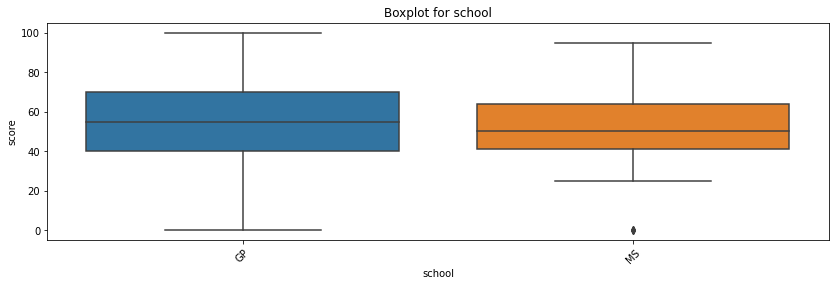

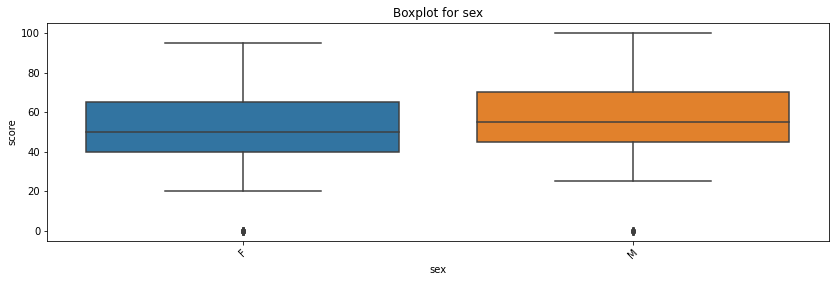

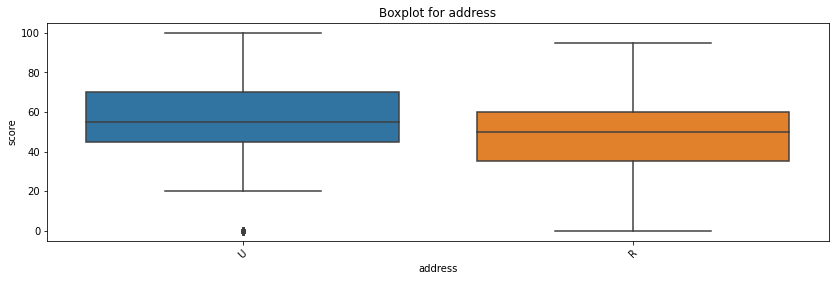

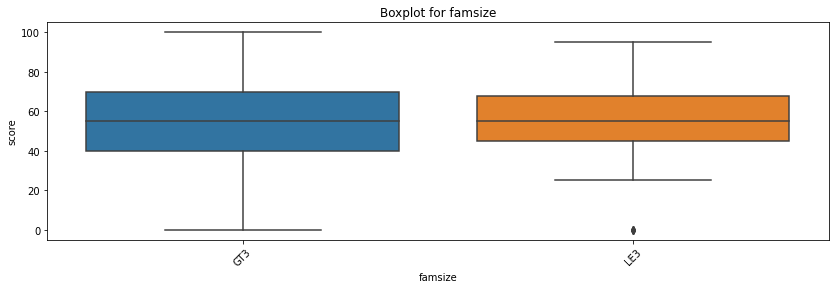

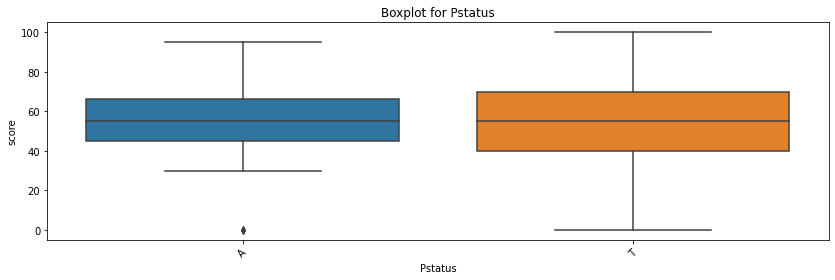

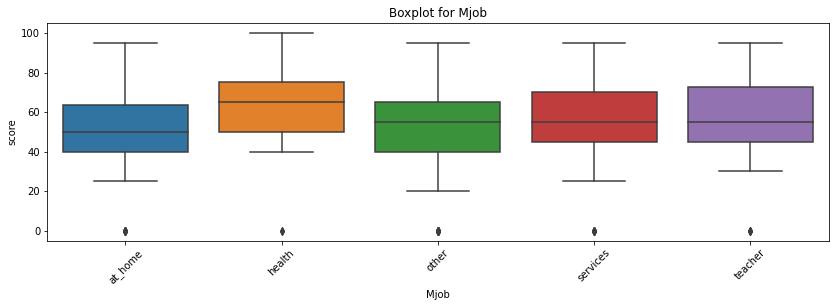

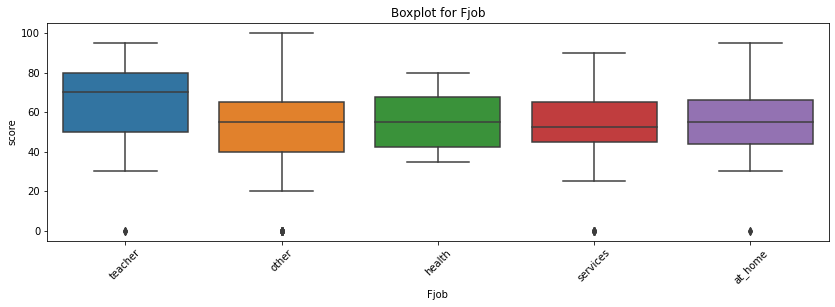

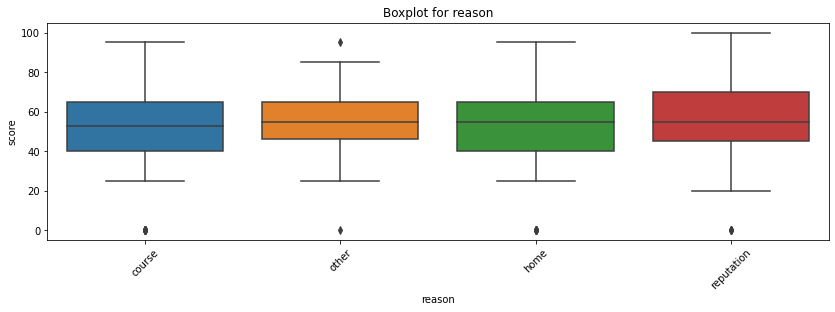

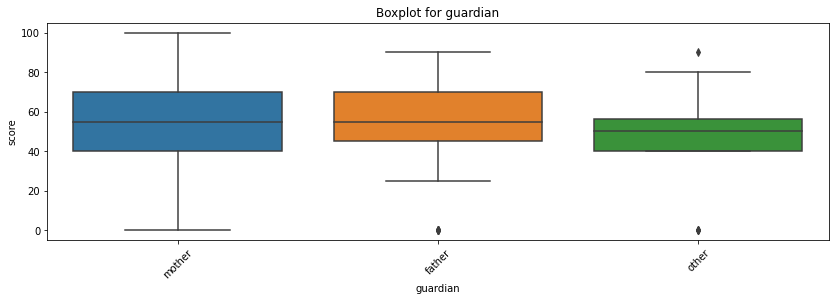

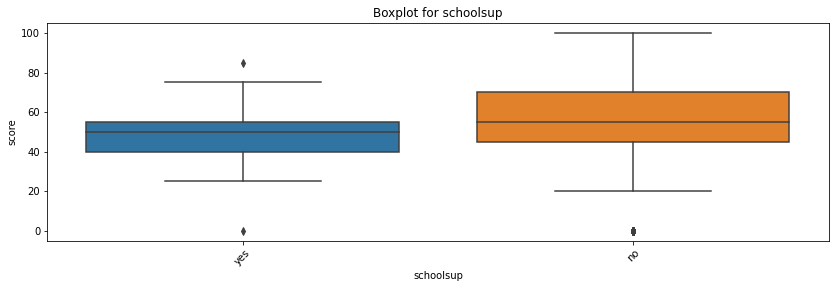

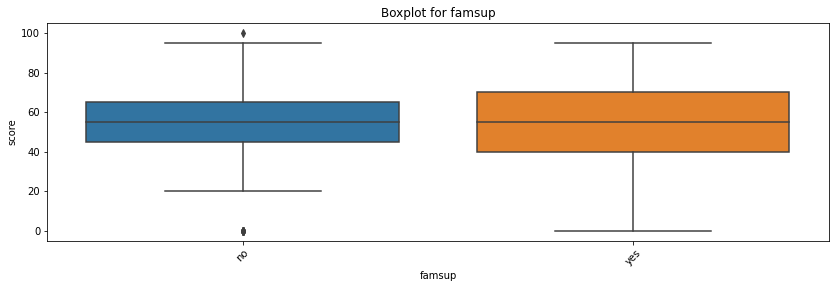

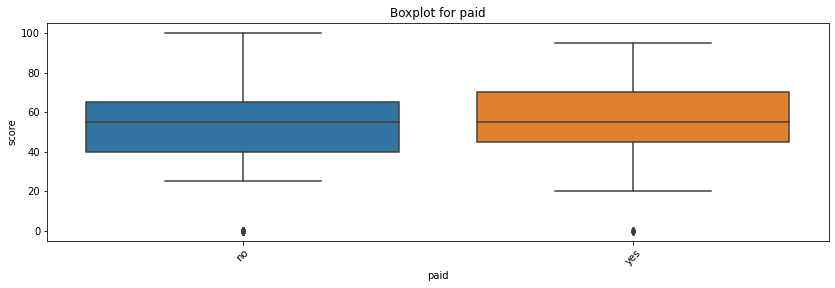

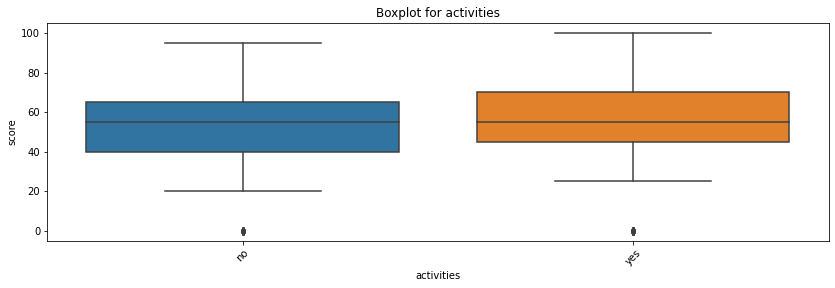

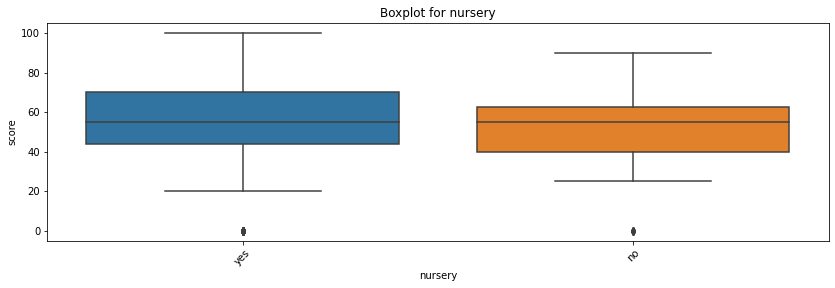

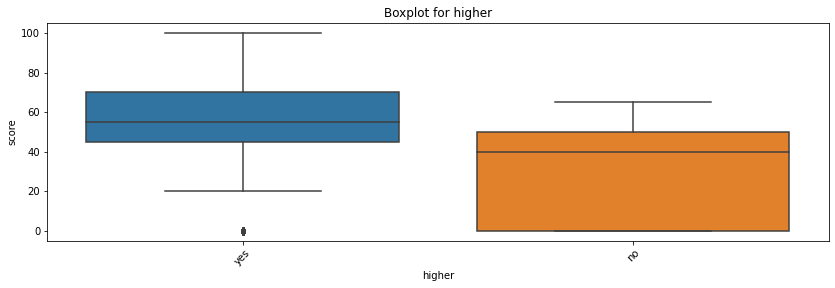

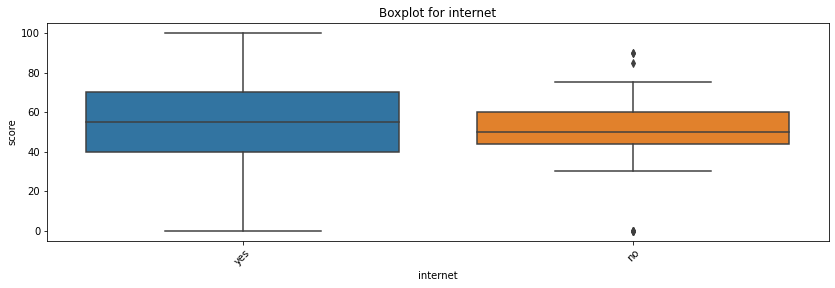

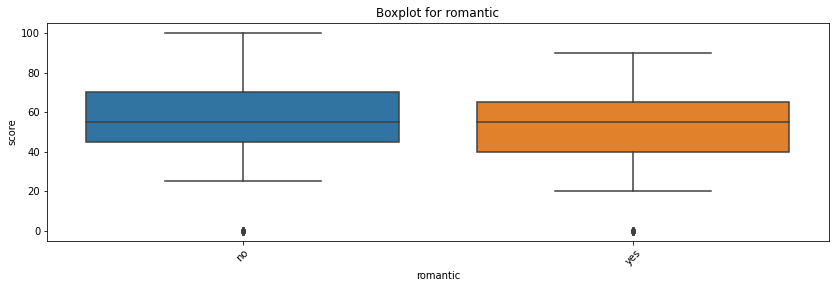

In [18]:
#Анализ номинативных переменных:

def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

for column in df.columns:
    if column not in num_columns and column != 'score':
        get_boxplot(column)
        
#как видно по графикам, можно предположить, что на успеваемость учащихся в большей или меньшей степени
#могут влиять все факторы, кромк famsup, reason и Pstatus;требуется более строгий анализ

In [16]:
#с помощью теста Стьюдента проверим нулевую гипотезу о том, что распределения успеваемости учащихся по различным
#параметрам неразличимы:

def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
            
for column in df.columns:
    if column not in num_columns and column != 'score':
        get_stat_dif(column)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [ ]:
#Как видно, в датасете серьёзно различаются следующие номинативные параметры: sex, address, Mjob, higher, romantic.

In [25]:
#Вывод: важные переменные, которые, возможно, окзывают влияние на успеваемость:
#failures, sex, address, Mjob, higher, romantic.
#Оставим их в датасете для дальнейшего построения модели:

variables_for_model = df.loc[:, ['failures', 'sex', 'address', 'Mjob', 'higher', 'romantic']]
variables_for_model.head()

,failures,sex,address,Mjob,higher,romantic
0,0.0,F,U,at_home,yes,no
1,0.0,F,U,at_home,yes,no
2,3.0,F,U,at_home,yes,no
3,0.0,F,U,health,yes,yes
4,0.0,F,U,other,yes,no
